In [8]:
import selenium
print(selenium.__version__)
import time

4.33.0


In [3]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get("https://www.google.co.th")

In [4]:
driver.quit()

## scrape

In [5]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('http://th.wikipedia.org/wiki/กูเกิล')
print(driver.current_url)
print(driver.title)
print(len(driver.page_source))
driver.quit()     

https://th.wikipedia.org/wiki/%E0%B8%81%E0%B8%B9%E0%B9%80%E0%B8%81%E0%B8%B4%E0%B8%A5
กูเกิล - วิกิพีเดีย
516620


## change page

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get("http://www.google.co.th")
print(driver.title)
driver.get('http://th.wikipedia.org')
print(driver.title)
time.sleep(2)
driver.back()
print(driver.title)
driver.forward()
print(driver.title)
driver.quit()

Google
วิกิพีเดีย สารานุกรมเสรี


## capture page

In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option('detach', True)
driver = webdriver.Chrome(options=chrome_options)
url = 'https://www.wikipedia.org/wiki/pizza'
driver.get(url)
driver.save_screenshot('pizza.png')
driver.quit()

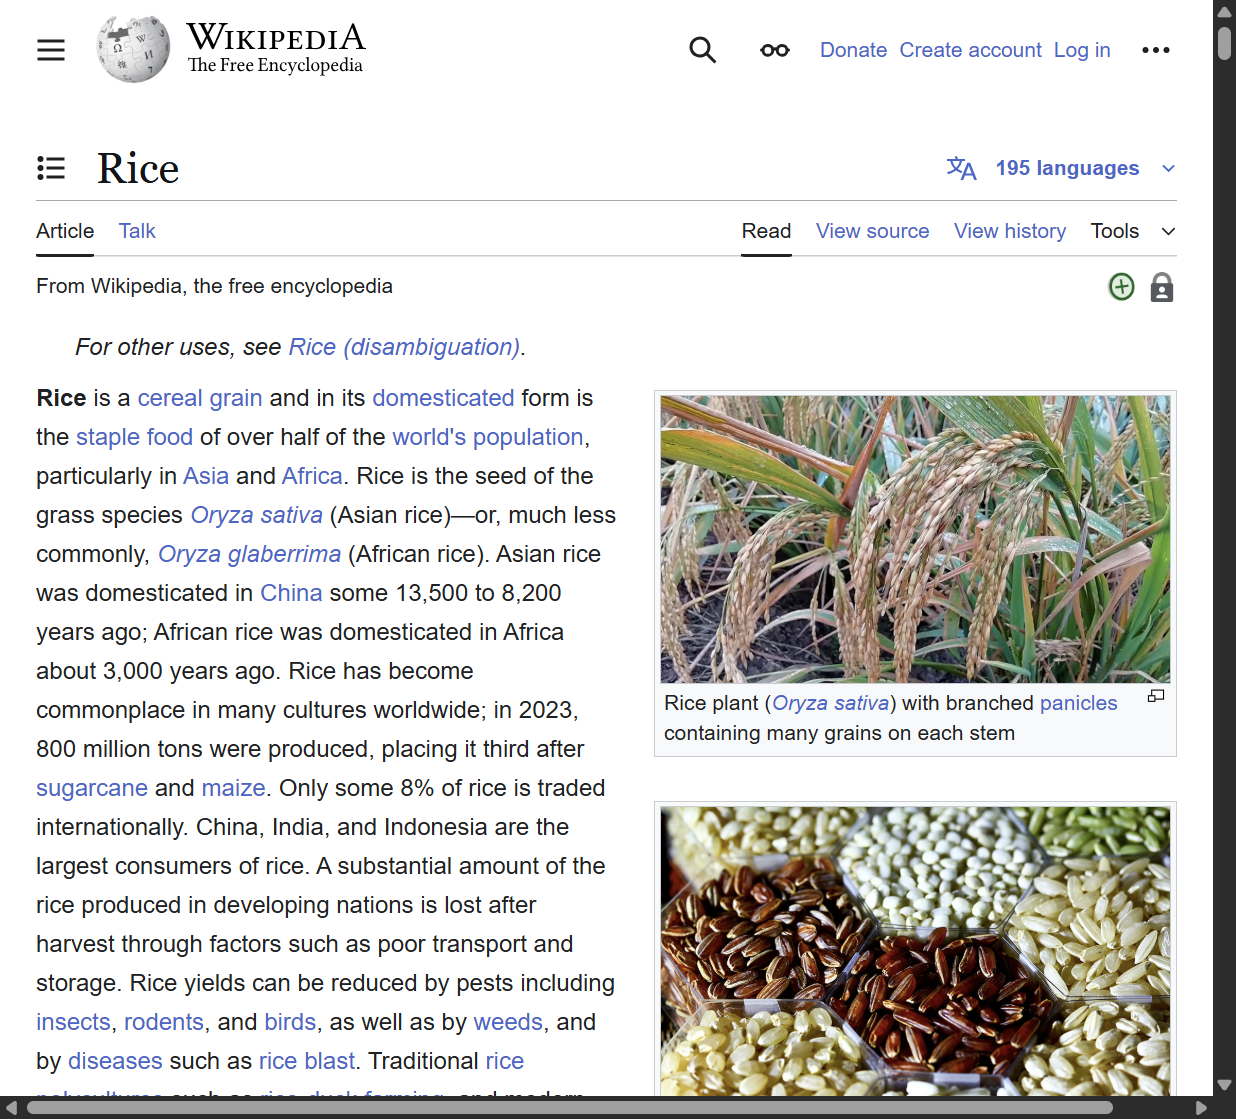

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option('detach', True)
driver = webdriver.Chrome(options=chrome_options)
url = 'https://www.wikipedia.org/wiki/rice'
driver.get(url)

import PIL
from PIL import Image
import io

img_name = 'rice.png'
img = driver.get_screenshot_as_png()
image=Image.open(io.BytesIO(img))
display(image)
driver.quit()

## open page by headless

In [28]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option('detach', True)
chrome_options.add_argument('--headless')
chrome_options.add_argument('--window-size=500,400')
driver = webdriver.Chrome(options=chrome_options)
url = 'https://www.selenium.dev/selenium/web/web-form.html'
driver.get(url)
driver.save_screenshot('selenium form.png')
driver.quit()

In [30]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option('detach', True)
chrome_options.add_argument('--headless')
driver = webdriver.Chrome(options=chrome_options)
url = 'https://www.selenium.dev/selenium/web/web-form.html'
driver.get(url)
driver.set_window_size(800,600)
driver.save_screenshot('selenium form2.png')
driver.quit()

## run by javascript

In [31]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://google.co.th?hl=th')
driver.set_window_size(580,310)
kwang = driver.execute_script("return window.outerWidth;")
sung = driver.execute_script("return window.outerHeight;")
driver.execute_script('alert("กว้าง = %d, สูง =%d");'%(kwang,sung))

## capture full page

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_experimental_option('detach', True)
driver = webdriver.Chrome(options=chrome_options)
# url = 'https://www.google.co.th'
url = 'https://www.python.org/downloads/'
driver.get(url)

width = driver.execute_script("return document.body.scrollWidth;")
height = driver.execute_script("return document.body.scrollHeight;")
driver.set_window_size(width,height)
driver.execute_script("document.body.style.overflow = 'hidden';")
driver.save_screenshot('fullscreen.png')
driver.quit()

# [element](https://selenium-python.readthedocs.io/locating-elements.html)
- by id
- byname
- elements by class name
- elements by tag name
- elements by css selector
- hyperlinks by link text
- partial link text
- by xpath

In [44]:
# find_element : return one element (raise error if not found)
# find_elements : expect return more than one elements (return empty list if not found)

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import os
import time
chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
chrome_options.add_experimental_option('detach', True)
driver = webdriver.Chrome(options=chrome_options)
file_path = os.path.abspath("example.html")
url = f"file://{file_path}"

# <div class="alert-message" data-type="warning">Error</div>

driver.get(url)
print('-------------------------------------')
element =  driver.find_element(By.CLASS_NAME,'alert-message')
print('Text:', element.text)
print('Class: ', element.get_attribute('class'))
print('Data-type:', element.get_attribute('data-id'))

print('-------------------------------------')
# <!-- ID -->
# <input type="text" id="username">
username_input = driver.find_element(By.ID, "username")
username_input.send_keys('typename')

# By.NAME
# <!-- Name -->
# <input type="password" name="user_password">
password_input = driver.find_element(By.NAME, "user_password")
password_input.send_keys('aaaa')
print('-------------------------------------')

# <!-- Class -->
# <div class="alert-message" data-id="10">Error</div>
alert_box = driver.find_element(By.CLASS_NAME, "alert-message")
print(alert_box.text)
print('-------------------------------------')

# <!-- Tag -->
# <button>Submit</button>
# By.TAG_NAME
submit_button = driver.find_element(By.TAG_NAME, "button")
print(submit_button.text)
print('-------------------------------------')

# By.LINK_TEXT  # exactly match and case sensitive
# <!-- Link Text -->
# <a href="/home">Go to Home</a>
home_link = driver.find_element(By.LINK_TEXT, "Go to Home")
home_link.click()
time.sleep(2)
driver.back()
print('-------------------------------------')

# By.PARTIAL_LINK_TEXT
# <!-- Partial Link Text -->
# <a href="/home">Go to Home Page</a>
partial_home_link = driver.find_element(By.PARTIAL_LINK_TEXT, "Home Page")
partial_home_link.click()
time.sleep(2)
driver.back()
print('-------------------------------------')

# <!-- CSS Selector -->
# <div class="card">
#   <button class="btn">Buy</button>
# </div>
# By.CSS_SELECTOR
buy_button = driver.find_element(By.CSS_SELECTOR, "div.card > button.btn")
print(buy_button.text)
print('-------------------------------------')


# By.XPATH
# <!-- XPath -->
# <div class="profile" data-id="123">John Doe</div>
profile_div = driver.find_element(By.XPATH, "//div[@class='profile' and @data-id='123']")


# <!-- checkbox -->
# <input type="checkbox" id="subscribe" />
# <label for="subscribe">Subscribe to newsletter</label>

checkbox = driver.find_element(By.ID, "subscribe")

# driver.quit()
if not checkbox.is_selected():
    checkbox.click()

time.sleep(2)
checkbox.click()

# Find all elements with class 'item'
items = driver.find_elements(By.CLASS_NAME, "item")

# Loop through and print the text of each element
for item in items:
    print(item.text)

# driver.quit()


-------------------------------------
Text: Error
Class:  alert-message
Data-type: 10
-------------------------------------
-------------------------------------
Error
-------------------------------------
Submit
-------------------------------------
-------------------------------------
-------------------------------------
Buy
-------------------------------------
Apple
Banana
Cherry


## dimension and location

In [52]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://www.google.co.th?hl=th')
q = driver.find_element('name','q')
print(q.size)
print(q.location)
print(q.tag_name)

{'height': 46, 'width': 404}
{'x': 168, 'y': 273}
textarea


# attribute

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://www.google.co.th?hl=th')
q = driver.find_element('name','q')
print(q.get_attribute('class'))
print(q.get_attribute('type'))
print(q.get_attribute('title'))

gLFyf
textarea
ค้นหา


## type in textbox

In [ ]:
from selenium import webdriver

options = webdriver.ChromeOptions()
# options.add_argument('--headless')
options.add_argument('--window-size=400,400')
driver = webdriver.Chrome(options=options)
driver.get('https://th.wikipedia.org/w/index.php?title=พิเศษ:ล็อกอิน')
wpname = driver.find_element('id','wpName1')
wpname.send_keys('ฉันเองไงล่ะ')


## key_enter

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

options = webdriver.ChromeOptions()
options.add_argument('--window-size=1024,768')
driver = webdriver.Chrome(options=options)
driver.get('https://www.soccersuck.com')
# q = driver.find_element('XPATH','//*[@id="header_email"]')
# # q.click()
# q.send_keys('python')
# # q.send_keys(Keys.ENTER)
# time.sleep(1)
# q = driver.find_element('class','header_register')
# # time.sleep(1)
# driver.quit()

## select data

In [11]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
driver = webdriver.Chrome()
driver.get('https://www.google.co.th?hl=th')
q = driver.find_element('name','q')
q.send_keys('ใครมา')
time.sleep(2)
q.send_keys(Keys.SHIFT+Keys.LEFT+Keys.LEFT) # ลากคลุมไปทางซ้าย ๒ ช่อง
time.sleep(2)
q.send_keys(Keys.CONTROL+'c') # คัดลอกข้อความที่ลากคลุม
time.sleep(2)
q.send_keys(Keys.CONTROL+'a') # ลากคลุมข้อความทั้งหมด
time.sleep(2)
q.send_keys(Keys.DELETE) # ลบข้อความทั้งหมด
time.sleep(2)
q.send_keys('ไม่')
q.send_keys(Keys.CONTROL+'v') # แปะข้อความ

In [12]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://www.google.co.th/search?q=กาแฟ&hl=th')
lis_h3 = driver.find_elements('tag name','h3')
for h3 in lis_h3:
    print('~',h3.text)
driver.quit()

## Get cookies

In [16]:
import undetected_chromedriver as uc
import time
driver = uc.Chrome()
driver.get('https://www.google.co.th/search?q=กาแฟ&hl=th')
lis_h3 = driver.find_elements('tag name','h3')
for h3 in lis_h3:
    print('~', h3.text)
# driver.quit()


In [ ]:
pip install undetected-chromedriver

Note: you may need to restart the kernel to use updated packages.


In [1]:
import undetected_chromedriver as uc
import time

driver = uc.Chrome()
driver.get('https://www.google.co.th/search?q=กาแฟ&hl=th')
time.sleep(2)  # wait for page to load

lis_h3 = driver.find_elements('tag name', 'h3')
for h3 in lis_h3:
    print('~', h3.text)

driver.quit()

~ แผนที่
~ ดูสถานที่เพิ่มเติม
~ 8 เมนูกาแฟสดยอดฮิตที่คุณไม่ควรพลาด พร้อมวิธีการทำง่าย ๆ
~ 
~ 
~ 
~ 
~ กาแฟ
~ 5 ประโยชน์ของกาแฟ ที่คุณควรรู้ก่อนดื่ม
~ vpp coffee
~ กินไปเหอะ - ไม่ได้สน กาแฟเกอิชง อิชาเลย กุมาเพราะชอบแก้ว ...
~ กาแฟผงยี่ห้อไหน ใกล้เคียงกาแฟสดที่สุดคะ
~ 9 กาแฟสําเร็จรูป กาแฟผง ยี่ห้อไหนดี 2025 กลิ่นหอม อร่อยเข้มข้น ...
~ กาแฟสำเร็จรูป กาแฟพร้อมดื่ม | สั่งเลย สั่งง่าย ส่งไว ครบตรงใจคุณ
~ สั่งซื้อ กาแฟ ราคาดี ลดราคา ออนไลน์ | เครื่องดื่ม อาหารและ ...


In [2]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://th.wikipedia.org/wiki/รายชื่อประเทศ_ดินแดน_และเมืองหลวง')
lis_sathan = driver.find_elements('partial link text','สถาน')
for sathan in lis_sathan:
    print(sathan.text)

คาซัคสถาน
คีร์กีซสถาน
เติร์กเมนิสถาน
ทาจิกิสถาน
ปากีสถาน
อัฟกานิสถาน
อุซเบกิสถาน
สาธารณรัฐอิสลามอัฟกานิสถาน


In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get('https://th.wikipedia.org/wiki/รายชื่อประเทศ_ดินแดน_และเมืองหลวง')
# Find all <a> elements with title attribute containing 'ประเทศ'
a_tags = driver.find_elements(By.XPATH, "//a[contains(@title, 'ประเทศ')]")
# for a in a_tags:
#     print('~', a.get_attribute('title'))
for a in a_tags:
    print('~', a.text)


    
# <a href="link" title="ประเทศกัมพูชา">กัมพูชา</a>

~ 
~ กัมพูชา
~ 
~ กาตาร์
~ 
~ เกาหลีใต้
~ 
~ เกาหลีเหนือ
~ 
~ คาซัคสถาน
~ 
~ คีร์กีซสถาน
~ 
~ คูเวต
~ 
~ จอร์เจีย
~ 
~ จอร์แดน
~ 
~ จีน
~ 
~ ซาอุดีอาระเบีย
~ 
~ ซีเรีย
~ 
~ ไซปรัส
~ 
~ ญี่ปุ่น
~ 
~ ติมอร์-เลสเต
~ 
~ ตุรกี
~ 
~ เติร์กเมนิสถาน
~ 
~ ทาจิกิสถาน
~ 
~ ไทย
~ 
~ เนปาล
~ 
~ บรูไน
~ 
~ บังกลาเทศ
~ 
~ บาห์เรน
~ 
~ ปากีสถาน
~ 
~ พม่า
~ 
~ ฟิลิปปินส์
~ 
~ ภูฏาน
~ 
~ มองโกเลีย
~ 
~ มัลดีฟส์
~ 
~ มาเลเซีย
~ 
~ เยเมน
~ 
~ ลาว
~ 
~ เลบานอน
~ 
~ เวียดนาม
~ 
~ ศรีลังกา
~ 
~ สิงคโปร์
~ สิงคโปร์
~ 
~ อัฟกานิสถาน
~ 
~ อาเซอร์ไบจาน
~ 
~ อาร์มีเนีย
~ 
~ อินเดีย
~ 
~ อินโดนีเซีย
~ 
~ อิรัก
~ 
~ อิสราเอล
~ 
~ อิหร่าน
~ 
~ อุซเบกิสถาน
~ 
~ โอมาน
~ 
~ คิริบาส
~ 
~ ซามัว
~ 
~ ตองงา
~ 
~ ตูวาลู
~ 
~ นาอูรู
~ 
~ นิวซีแลนด์
~ 
~ ปาปัวนิวกินี
~ 
~ ปาเลา
~ 
~ ฟีจี
~ 
~ ไมโครนีเชีย
~ 
~ วานูวาตู
~ 
~ ออสเตรเลีย
~ 
~ กรีซ
~ 
~ คอซอวอ
~ 
~ โครเอเชีย
~ 
~ เช็กเกีย
~ 
~ ซานมารีโน
~ 
~ เซอร์เบีย
~ 
~ เดนมาร์ก
~ 
~ นอร์เวย์
~ 
~ 
~ บอสเนียและเฮอร์เซโกวีนา
~ 
~ บัลแกเรีย
~ 
~ เบลเยียม
~ 
~ เบลารุส
~ 
~ โปรตุเก

In [ ]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time

# Configure options for headless mode
options = uc.ChromeOptions()
# options.headless = True  # Run browser in background (silent)

# Initialize driver
driver = uc.Chrome(options=options)

# Open Google search
query = 'แมว'
driver.get(f'https://www.google.com/search?q={query}')

# Wait for results to load (adjustable)
time.sleep(2)

# Select all matching <h3> elements with the specified class
# <h3 class = "LC20lb MBeuO DKV0Md">
h3_elements = driver.find_elements(By.CSS_SELECTOR, 'h3.LC20lb.MBeuO.DKV0Md')

# Print the text of each matched element
for h3 in h3_elements:
    print(h3.text)

driver.quit()


แมว




สายพันธุ์แมว - Purina
แมว
สายพันธุ์แมว
สอบถามเอาแมวกลับไปเลี้ยงที่บ้านต่างจังหวัด
แมว
60000+ ฟรี แมว & สัตว์ รูปภาพ
การเล่นกับลูกแมวตัวน้อย - Whiskas
ชิเอลแมวมึน
